<IPython.core.display.Javascript object>


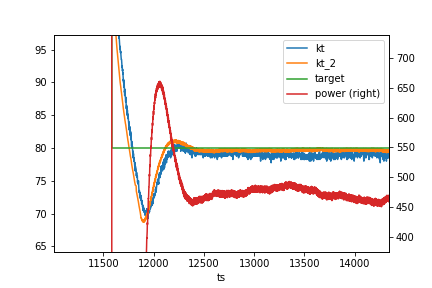

In [1092]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = []
data += [[int(a) for a in s.split()] for s in open('../valurap/valurap/scripts/tc.txt').readlines() if len(s.split()) == 5]
#data += [[int(a) for a in s.split()] for s in open('../valurap/valurap/scripts/tc1.txt').readlines() if len(s.split()) == 5]
#data += [[int(a) for a in s.split()] for s in open('../valurap/valurap/scripts/tc2.txt').readlines() if len(s.split()) == 5]
data = np.array(data)
#data

df = pd.DataFrame({"ts": data[:,0] - data[0][0], "kt_raw": data[:,1], "adc": data[:,2], "target": data[:,3], "power": data[:,4]})
df["kt"] = df["kt_raw"]/32.0
#df["kt_2"] = (10598 + 4 * df["adc"] - 295 * np.sqrt(df["adc"]) - df["adc"] * df["adc"]/2190)/32
if 0:
    k_a = 10224.301840394328
    k_b = 4.085829692635546
    k_c = 293.43886592054656
    k_d = 2195.0869319029166
elif 0:
    k_a = 10157.248088505836
    k_b = 4.048157368785188
    k_c = 290.4618720445963
    k_d = 2211.048403507233
else:
    k_a = 34559.81079669996
    k_b = 23.403465213527173
    k_c = 1597.6375102179459
    k_d = 603.5807868219972


df["kt_2"] = (k_a + k_b * df["adc"] - k_c * np.sqrt(df["adc"]) - df["adc"] * df["adc"]/k_d)/32

fig, ax = plt.subplots()

if 0:
    df.plot(x="kt", y="adc", ax=ax)
else:
    df.plot(x="ts", y=["kt", "kt_2", "target"], ax=ax)
    df.plot(x="ts", y=["power"], secondary_y=True, ax=ax)

10148.361080437136 3.860382912110765 -286.98039262175513 -2422.9607323737782


<IPython.core.display.Javascript object>


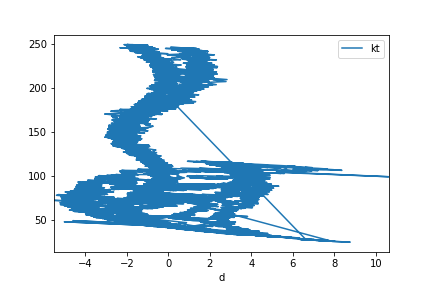

In [1089]:
from sklearn.linear_model import LinearRegression
sdf = df[df["kt"]>0]

reg = LinearRegression(fit_intercept=False).fit(
    np.array([
        sdf["adc"] * 0 + 1,
        sdf["adc"],
        np.sqrt(sdf["adc"]),
        sdf["adc"] * sdf["adc"],
        #df["adc"] * df["adc"] * df["adc"],
        #np.exp(df["adc"]/1000)
    ]).T, sdf["kt"] * 32)
print(reg.coef_[0], reg.coef_[1], reg.coef_[2], 1/reg.coef_[3])

df["kt_3"] = reg.predict(np.array([
        df["adc"] * 0 + 1,
        df["adc"],
        np.sqrt(df["adc"]),
        df["adc"] * df["adc"],
        #df["adc"] * df["adc"] * df["adc"],
        #np.exp(df["adc"]/1000)
    ]).T)/32

df["d"] = df["kt_3"] - df["kt"]

fig, ax = plt.subplots()

if 0:
    df.plot(x="kt", y="adc", ax=ax)
elif 1:
    df.plot(x="d", y="kt", ax=ax)
else:
    df.plot(x="ts", y=["kt", "kt_3", "target"], ax=ax)
    df.plot(x="ts", y=["power"], secondary_y=True, ax=ax)